# PYTHON EXERCISE

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats 

In [2]:
# reading data set
df = pd.read_csv('MD_agric_exam-4313.csv')

In [3]:
df.describe()

,Field_ID,Elevation,Rainfall,Min_temperature_C,Max_temperature_C,pH,Pollution_level,Plot_size,Annual_yield
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,2779.486000,628.136035,1197.734700,-4.504100,30.89460,5.603899,2.233740e-01,3.962400,2.101536
std,1595.068372,179.098546,497.794699,1.568117,1.92225,0.802154,2.288665e-01,3.459036,1.926694
min,1.000000,35.910797,110.100000,-9.700000,25.10000,3.701838,5.397448e-10,0.500000,0.174857
25%,1442.250000,504.392825,771.575000,-5.600000,29.57500,5.018775,4.449419e-02,1.500000,0.786612
50%,2728.500000,657.468975,1194.900000,-4.400000,30.90000,5.562078,1.661962e-01,2.900000,1.478622
75%,4133.000000,761.075752,1616.900000,-3.300000,32.20000,6.201437,3.077840e-01,4.700000,2.519811
max,5632.000000,1003.943700,2408.500000,-1.200000,37.30000,7.484683,9.954134e-01,15.000000,12.695224


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Field_ID           1000 non-null   int64  
 1   Elevation          1000 non-null   float64
 2   Rainfall           1000 non-null   float64
 3   Min_temperature_C  1000 non-null   float64
 4   Max_temperature_C  1000 non-null   float64
 5   pH                 1000 non-null   float64
 6   Pollution_level    1000 non-null   float64
 7   Plot_size          1000 non-null   float64
 8   Annual_yield       1000 non-null   float64
 9   Crop_type          1000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 78.3+ KB


In [5]:
df.shape

(1000, 10)

In [6]:
df.head()

,Field_ID,Elevation,Rainfall,Min_temperature_C,Max_temperature_C,pH,Pollution_level,Plot_size,Annual_yield,Crop_type
0,1162,494.95615,1507.6,-5.4,31.0,6.859436,0.007034,3.6,1.617421,coffee
1,5108,663.73390,581.0,-4.7,30.9,5.603219,0.289643,4.2,2.532497,potato
2,3504,396.87990,1715.1,-6.1,31.7,5.774116,0.000409,2.6,1.262207,banana
3,5351,594.80370,1748.0,-4.3,33.6,6.477415,0.088777,7.9,4.351564,wheat
4,905,609.49800,1395.8,-4.5,31.3,5.419586,0.050023,10.8,5.034791,cassava


# Using the data set to answer the follwing questions

Q1: Write code to determine the number of unique crop types in the dataset?

In [7]:
# getting unique count for crop type
unique_crop = len(df.Crop_type.unique())
unique_crop

8

Q2: Identify the maximum annual yield for "wheat" crop type in the dataset (rounded to 2 decimal places).

In [8]:
# Filter rows where crop_type is "wheat"
wheat_df = df[df['Crop_type'] == 'wheat']

# Find the maximum annual yield for wheat
max_yield = wheat_df['Annual_yield'].max()

# Round the maximum yield to 2 decimal places
max_yield_rounded = round(max_yield, 2)

print("Maximum annual yield for wheat crop type:", max_yield_rounded)


Maximum annual yield for wheat crop type: 8.99


Q3: Find the total rainfall for crop types where the average pollution level is above 0.2

In [9]:
# Calculate average pollution level for each crop type
avg_pollution = df.groupby('Crop_type')['Pollution_level'].mean()

# Filter crop types where average pollution level is above 0.2
polluted_crop_types = avg_pollution[avg_pollution > 0.2].index.tolist()

# Filter rows for the polluted crop types
polluted_df = df[df['Crop_type'].isin(polluted_crop_types)]

# Calculate total rainfall for the filtered crop types
total_rainfall = polluted_df['Rainfall'].sum()

print("Total rainfall for crop types where average pollution level is above 0.2:", total_rainfall)

Total rainfall for crop types where average pollution level is above 0.2: 941959.7


Q4: Write a function to calculate the temperature range (Max_temperature_C - Min_temperature_C) for each farmer's field. Then, call the function with the following `Field_ID`: `1458`, `1895`, and `5443`. What are the results of these 3 calls?

In [10]:
def calculate_temperature_range(df, field_id):
    """
    Calculate the temperature range (Max_temperature_C - Min_temperature_C) for a given farmer's field.

    Parameters:
        df (DataFrame): The DataFrame containing temperature data with columns 'Field_ID', 'Max_temperature_C', 
                       and 'Min_temperature_C'.
        field_id (int): The ID of the farmer's field for which the temperature range is to be calculated.

    Returns:
        float: The temperature range for the specified field ID.
    """
    # Filter rows for the specified field ID
    field_df = df[df['Field_ID'] == field_id]
    
    # Calculate temperature range
    temperature_range = field_df['Max_temperature_C'].max() - field_df['Min_temperature_C'].min()
    
    return temperature_range

# Assuming df is your DataFrame containing temperature data with columns 'Field_ID', 'Max_temperature_C', and 'Min_temperature_C'

# Call the function for Field_ID: 1458
result_1458 = calculate_temperature_range(df, 1458)

# Call the function for Field_ID: 1895
result_1895 = calculate_temperature_range(df, 1895)

# Call the function for Field_ID: 5443
result_5443 = calculate_temperature_range(df, 5443)

print("Temperature range for Field_ID 1458:", result_1458)
print("Temperature range for Field_ID 1895:", result_1895)
print("Temperature range for Field_ID 5443:", result_5443)


Temperature range for Field_ID 1458: 40.7
Temperature range for Field_ID 1895: 35.7
Temperature range for Field_ID 5443: 33.4


Q5: What does the following code achieve?

a = data['Crop_type'].unique()

b = float('inf')

c = ''

for crop in a:

    d = data[data['Crop_type'] == crop]['Min_temperature_C'].mean()

    if d < b:

        b = d

        c = crop

print(c)

Answer: Identifies the crop type with the lowest average minimum temperature.

Q6: Write code to calculate the total plot size for plots where the pH is less than 5.5.

In [11]:

# Filter rows where pH is less than 5.5
filtered_df = df[df['pH'] < 5.5]

# Calculate the total plot size for filtered plots
total_plot_size = filtered_df['Plot_size'].sum()

print("Total plot size for plots with pH less than 5.5:", total_plot_size)


Total plot size for plots with pH less than 5.5: 1731.8999999999999


Q7: Using Pandas, create a dataframe that includes entries with a 'Min_temperature_C’< -5 and a 'Max_temperature_C' > 30. How many rows are in the filtered dataset?



In [12]:
# Filter the DataFrame based on conditions
filtered_df1 = df[(df['Min_temperature_C'] < -5) & (df['Max_temperature_C'] > 30)]

# Count the number of rows in the filtered DataFrame
num_rows = filtered_df1.shape[0]

print("Number of rows in the filtered dataset:", num_rows)


Number of rows in the filtered dataset: 319


Q8: Using Numpy, calculate the standard deviation of the 'Rainfall' for plots where the 'Plot_size' is larger than the median plot size of the dataset (round to 2 decimal places).



In [13]:
# Calculate the median plot size
median_plot_size = np.median(df['Plot_size'])

# Find the indices where plot size is larger than the median plot size
indices = np.where(df['Plot_size'] > median_plot_size)[0]

# Filter rainfall data for plots with larger plot size
rainfall_filtered = df['Rainfall'][indices]

# Calculate the standard deviation of rainfall for plots with larger plot size
std_dev_rainfall = np.std(rainfall_filtered)

# Round the result to 2 decimal places
std_dev_rainfall_rounded = round(std_dev_rainfall, 2)

print("Standard deviation of Rainfall for plots with plot size larger than the median:", std_dev_rainfall_rounded)


Standard deviation of Rainfall for plots with plot size larger than the median: 469.62


Q9: If you concatenate the first three digits of the most common ‘Max_temperature_C’ with the last three letters of the least common 'Crop_type', what string do you get?
Note: Use the first mode if there are multiple modes

In [14]:
# Find the most common 'Max_temperature_C'
most_common_max_temp = df['Max_temperature_C'].mode().iloc[0]

# Extract the first three digits of the most common 'Max_temperature_C'
first_three_digits = str(most_common_max_temp)[:3]

# Find the least common 'Crop_type'
least_common_crop_type = df['Crop_type'].value_counts().idxmin()

# Extract the last three letters of the least common 'Crop_type'
last_three_letters = least_common_crop_type[-3:]

# Concatenate the extracted parts
result_string = first_three_digits + last_three_letters

print("Concatenated string:", result_string)


Concatenated string: 30.ice


Write Python code to create a violin plot visualising the distribution of 'Annual_yield' across different 'Elevation' ranges. Use the provided elevation range categories (Low: < 300m, Medium: 300m - 600m, High: > 600m) to categorise the data before plotting.  Examine the violin plot displaying the distribution of 'Annual Yield' across three elevation categories (Low, Medium, High). What insight does the violin plot provide regarding the relationship between elevation ranges and annual yield distribution?


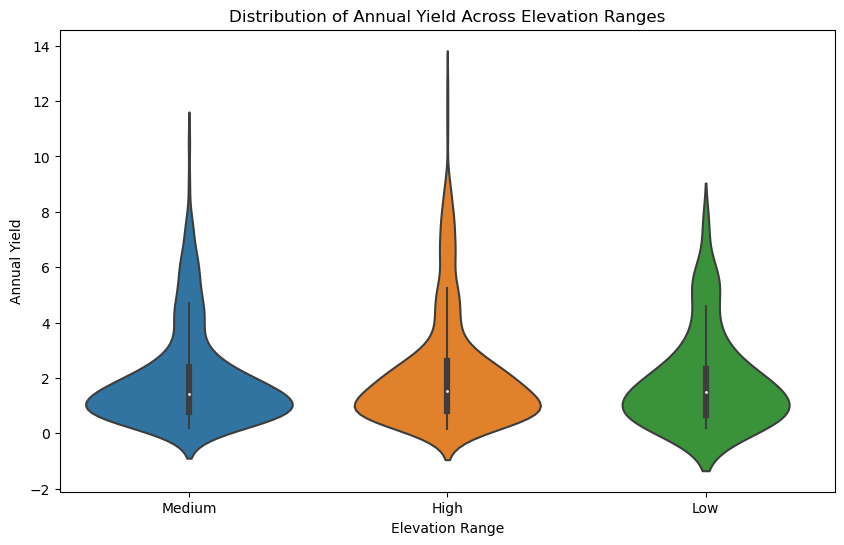

In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Define conditions and corresponding categories
conditions = [
    (df['Elevation'] < 300),
    (df['Elevation'] >= 300) & (df['Elevation'] <= 600),
    (df['Elevation'] > 600)
]
categories = ['Low', 'Medium', 'High']

# Apply categorization using np.select()
df['Elevation_Category'] = np.select(conditions, categories, default='Unknown')

# Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Elevation_Category', y='Annual_yield')
plt.title('Distribution of Annual Yield Across Elevation Ranges')
plt.xlabel('Elevation Range')
plt.ylabel('Annual Yield')
plt.show()


Q11: Assuming each 'Crop_type' contributes an integer value equal to its length (e.g., 'wheat' contributes 5), write a recursive function to sum the integer values for each unique crop type in the dataset. What is the sum?

In [16]:
def sum_crop_type_lengths(Crop_type):
    """
    Recursively calculates the sum of integer values for each unique crop type in the dataset.

    Parameters:
        crop_types (list): A list containing crop type strings.

    Returns:
        int: The sum of integer values for each unique crop type.
    """
    # Base case: If the list is empty, return 0
    if not Crop_type:
        return 0
    
    # Get the first crop type
    Crop_types = Crop_type[0]
    
    # Calculate the length of the crop type and add it to the sum
    crop_type_length = len(Crop_types)
    
    # Recursive call: Sum the length of the current crop type with the sum of the rest of the crop types
    return crop_type_length + sum_crop_type_lengths(Crop_type[1:])

# List of all crop types in the dataset
crop_types = ['coffee', 'potato', 'banana', 'wheat', 'cassava', 'maize', 'tea', 'rice']

# Call the function to calculate the sum of integer values for each unique crop type
sum_of_lengths = sum_crop_type_lengths(crop_types)

print("Sum of integer values for each unique crop type:", sum_of_lengths)


Sum of integer values for each unique crop type: 42


Q12: Write Python code to perform a t-test comparing the average 'Annual_yield' between 'coffee' and 'banana' crop types using scipy.stats. What is the p-value, rounded to three decimal places? 

In [17]:
# Filter data for 'coffee' and 'banana' crop types
coffee_yield = df[df['Crop_type'] == 'coffee']['Annual_yield']
banana_yield = df[df['Crop_type'] == 'banana']['Annual_yield']

# Perform t-test
t_statistic, p_value = stats.ttest_ind(coffee_yield, banana_yield, equal_var=False)

# Print the p-value rounded to three decimal places
print("The p-value is:", round(p_value, 3))


The p-value is: 0.598


# END OF EXERCISE